/home/uos/venv_ABM/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessCombined' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/uos/venv_ABM/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Hall of Fame:
Offset, k0: 0.2745
Lit State, k1: 0.2111
Sensor State, k2: 0.0573
Light N-1, k3: 0.4637
Light N-2, k4: 0.9294
Light N+1, k5: -0.6652
Light N+2, k6: -0.8793
(0.0, 27.956893036502432)


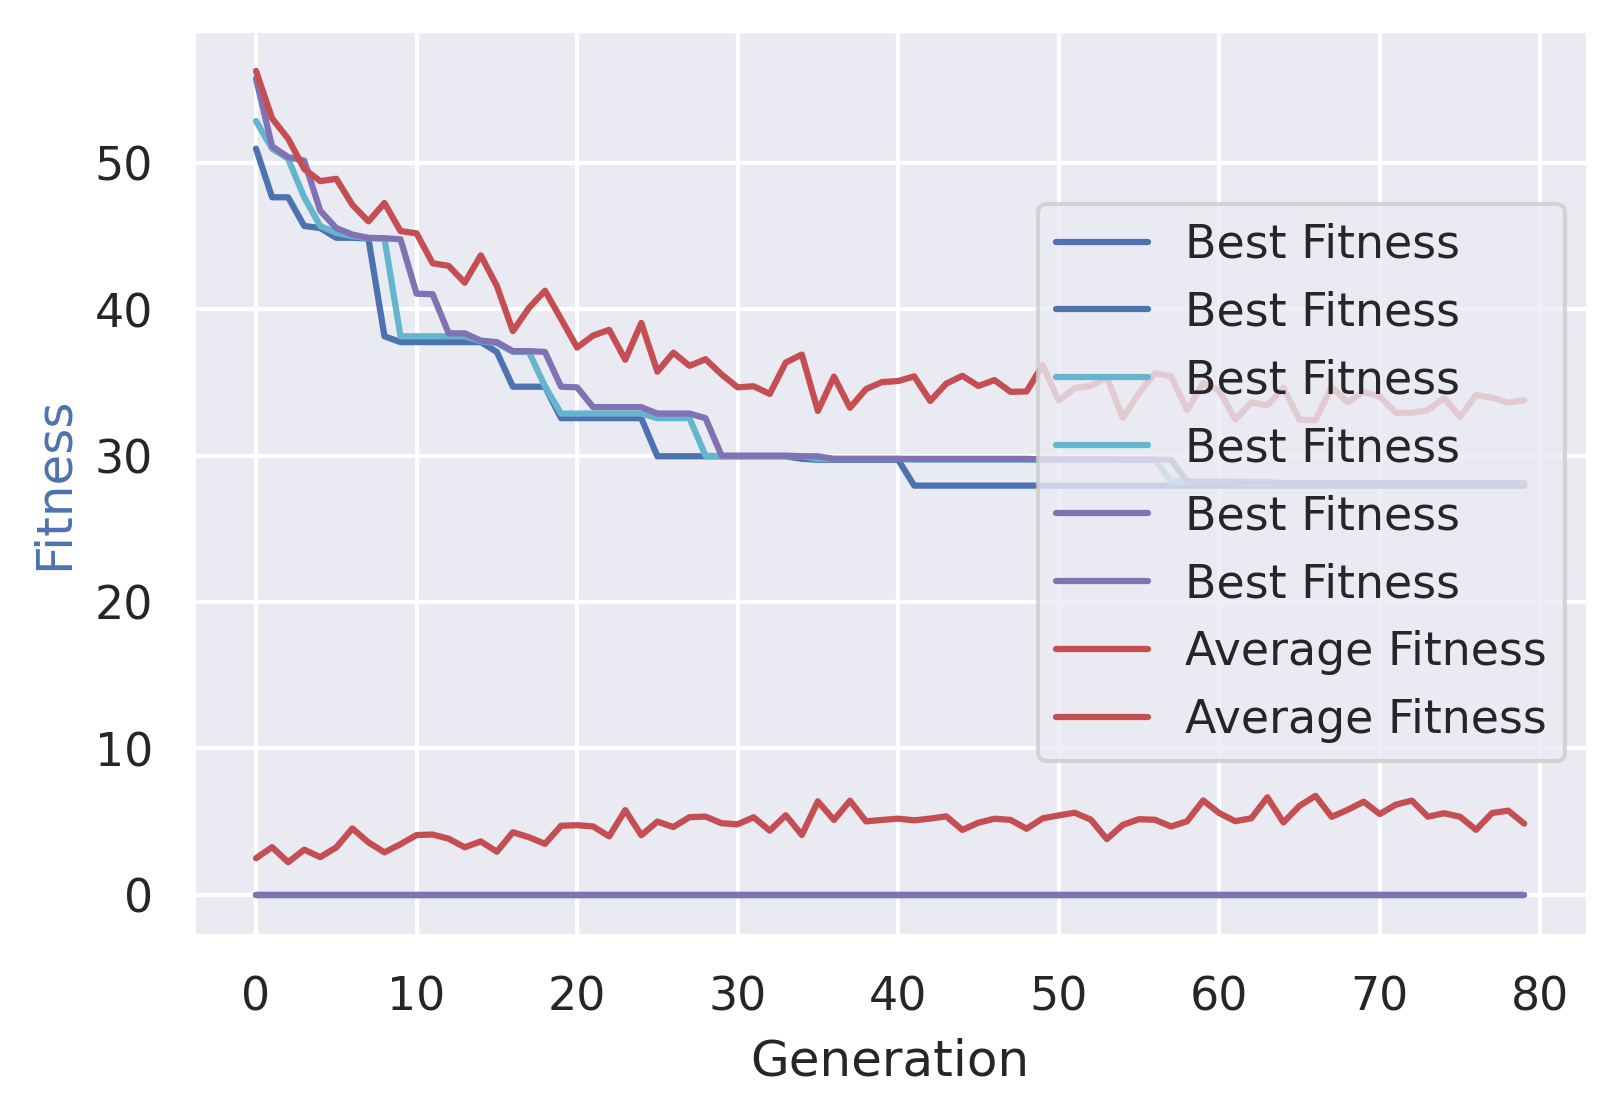

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

import random
import pickle
from numpy.random import default_rng
from deap import base
from deap import creator
from deap import tools

sns.set_theme()
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 300
rng = default_rng()

IND_SIZE = 7

toolbox = base.Toolbox()
creator.create('FitnessCombined', base.Fitness, weights=(-1.0, -1.0, -1.0))
creator.create('Individual', list, fitness=creator.FitnessCombined)
toolbox.register('attr_float', random.random)
# Structure initializers
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

# then load the data from the file
with open('evolution_long_run_20.pkl', 'rb') as cp_file:
    cp = pickle.load(cp_file)
halloffame = cp['halloffame']
logbook = cp['logbook']

print('Hall of Fame:')
print('Offset, k0: %.4f' % halloffame[0][0])
print('Lit State, k1: %.4f' % halloffame[0][1])
print('Sensor State, k2: %.4f' % halloffame[0][2])
print('Light N-1, k3: %.4f' % halloffame[0][3])
print('Light N-2, k4: %.4f' % halloffame[0][4])
print('Light N+1, k5: %.4f' % halloffame[0][5])
print('Light N+2, k6: %.4f' % halloffame[0][6])
print(halloffame[0].fitness.values)
gen = logbook.select('gen')
logged_best = logbook.select('best')
logged_avgs = logbook.select('avg')

best_0 = [best[0] for best in logged_best]
best_1 = [best[1] for best in logged_best]
best_2 = [best[2] for best in logged_best]
fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, best_0, '#4c72b0', label='Best Fitness')
line2 = ax1.plot(gen, best_1, '#64b5cd', label='Best Fitness')
line3 = ax1.plot(gen, best_2, '#8172b3', label='Best Fitness')
line4 = ax1.plot(gen, logged_avgs, '#c44e52', label='Average Fitness')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Fitness', color='b')

lns = line1 + line2 + line3 + line4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='center right')

plt.savefig('img/genetic_tests_21.png')
